In [4]:
using Pkg,Plots,DataFrames,CSV

In [16]:
h = 5.0
v = 0.2
a = 1.0
b = 1.0
x_min = 0.0
x_max = 6.0
y_min = -1.0
y_max = 5.0
t_min = 0.0
t_max = 20.0
dt = 0.1
steps= t_max / dt + 1
c = sqrt(a * a + b * b)
# 変数の初期値を設定
xa = 0.1
ya = 0.1
xb = 0.1
yb = 0.1

# リストを定義
hist_time = []
hist_plot_xa = []
hist_plot_ya = []
hist_plot_xb = []
hist_plot_yb = []
hist_plot_len = []

Any[]

┌ Info: Saved animation to 
│   fn = c:\work\test\EtchingAnimation\EtchingAnimation.gif
└ @ Plots C:\Users\thiro\.julia\packages\Plots\Di0Qb\src\animation.jl:114


Plots.AnimatedGif("c:\\work\\test\\EtchingAnimation\\EtchingAnimation.gif")
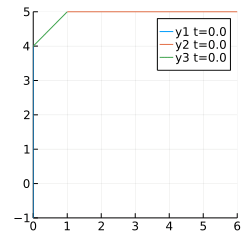

In [17]:
anim = @animate for t in t_min:dt:t_max
    push!(hist_time, t)
    x = x_min:dx:x_max
    y1 = @. h - v * t
    x2 = @. v * t
    y3 = @. b / a * x + h - b -  v * c / a * t
    ya = y1
    xa = a / b * (ya - h + b + v * c / a * t)
    push!(hist_plot_xa, xa)
    push!(hist_plot_ya, ya)
    xb = x2
    yb = b / a * xb + h - b - v * c / a * t
    push!(hist_plot_xb, xb)
    push!(hist_plot_yb, yb)
    xc = x2
    yc = y1
    if xa < xb
        xa = xc
        yb = yc
    end
    len = sqrt((xb - xa)^2 + (yb - ya)^2)
    push!(hist_plot_len, len)
    plot(
        [xb,xb],
        [y_min,yb],
        label="y1 t=$t",
        xlims=(x_min,x_max),
        ylims=(y_min,y_max),
        size=(250,250)
        )
    plot!(
        [xa,x_max],
        [ya,ya],
        label="y2 t=$t"
    )
    plot!(
        [xa,xb],
        [ya,yb],
        label="y3 t=$t"
    )
end
gif(anim,fps=30,"EtchingAnimation.gif")

In [19]:
df = DataFrame()
df.time = hist_time
df.xa = hist_plot_xa
df.ya = hist_plot_ya
df.xb = hist_plot_xb
df.yb = hist_plot_yb
df.len = hist_plot_len
CSV.write("./calc_plots.csv", df)

"./calc_plots.csv"

In [21]:
plot(df.time, df.yb, label="yb")
plot!(df.time, df.len, label="len")
xlabel!("TIme[s]")
savefig("./len.png")